# LDDS

## Tutorial 6: Lagrangian descriptors for a user-defined 2 DoF Hamiltonian system

The goal of this notebook in to illustrate how to compute Lagrangian descriptors on different phase space slices for a 2 DoF Hamiltonian system defined by the user.

We begin by importing the LDDS module, and from it, all the functions necessary to calculate and plot LDs.

In [26]:
import os, sys
sys.path.insert(1, os.pardir)
import ldds
from ldds.base import compute_lagrangian_descriptor
from ldds.tools import draw_all_lds
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### The Morse Oscillator

The Hamiltonian function that describes the Morse oscillator is:

\begin{equation*}
 H(x,p_x) = \dfrac{1}{2m}p_x^2 + D\left(1 - e^{-\alpha x}\right)^2
\end{equation*}

where $m$ is the mass, $D$ represents the well depth and $\alpha$ controls the well width. The vector field that defines the dynamical system is given by:

\begin{align}
   \dot{x} & = \dfrac{\partial H}{\partial p_x} = f_1(x,p_x) = \dfrac{p_x}{m} \\[.2cm]
   \dot{p}_x & = -\dfrac{\partial H}{\partial x} = f_2(x,p_x) = -2 D\,\alpha \left(e^{-\alpha x} - e^{-2\alpha x}\right)
\end{align}

Define `Morse1D` function containing the two-dimensional dynamical systems

In [27]:
def Morse1D(t, u, PARAMETERS = [1, 2, 1]):
    """
    Returns a user-defined 1-DoF vector field at time t, for an array of points in phase-space.
    Number of model parameters: 1 . PARAMETERS = [m, D, alpha]
    Functional form: v = ((1/m)*y, -2*D*alpha*(exp(-alpha*x) - exp(-2*alpha*x))), with u = (x, y)
    
    Parameters
    ----------
    t : float
        fixed time-point of vector field, for all points in phase-space.
        
    u : array_like, shape(n,)
        points in phase-space to determine vector field at common time t.
    
    PARAMETERS : list of floats
        vector field parameters
    
    Returns
    -------
    v : array_like, shape(n,)
        vector field corresponding to points u, in phase-space at time t
    """
    x, y = u.T
    ##############################################
    #
    # CHANGE STUFF BELOW ONLY
    #
    ##############################################
    # Hamiltonian Model Parameter
    m, D, alpha = PARAMETERS
    v = np.column_stack([ (1/m) * y, -2 * D * alpha * (np.exp(-alpha * x) - np.exp(-2 * alpha * x))])
    ##############################################
    #
    # CHANGE STUFF ABOVE ONLY
    #
    ##############################################    
    return v

### Define 2D grid to compute LDs

In [28]:
# Mesh parameters to calculate LDs

# 2D Domain
x_min,x_max = [-1, 7]
y_min,y_max = [-2.5, 2.5]

# Grid size
Nx, Ny = [400, 400]

grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

### Setup vector field and model parameters

In [29]:
# Morse oscillator parameters
m, D, alpha = [1, 2, 1]
vector_field = lambda t,u: Morse1D(t, u, PARAMETERS = [m, D, alpha])

### Compute and draw LDs at time $t = t_0$

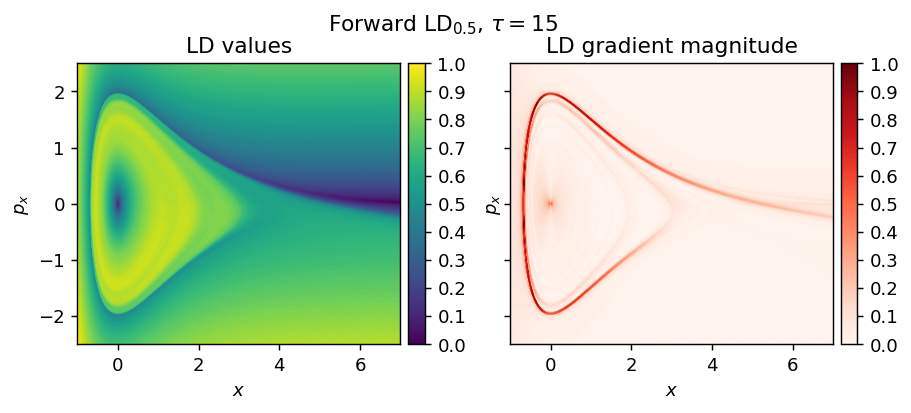

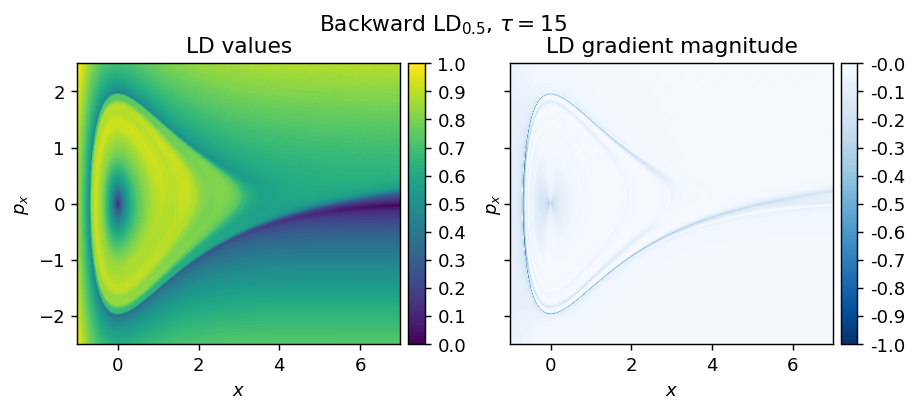

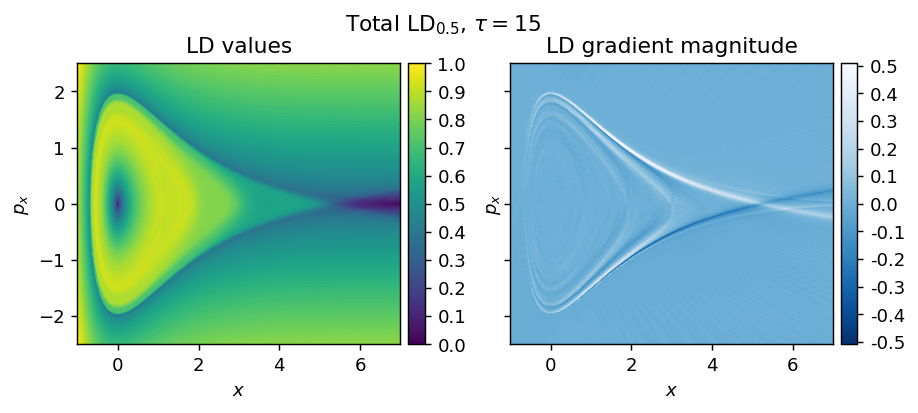

In [30]:
# Integration parameters (Calculate LDs at time t = t0 by integrating in the interval [t0-tau,t0+tau])
t0 = 0
tau = 15

# LDs definition (we will use the p-value seminorm)
p_value = 0.5

LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

We change next the model parameters:

In [31]:
# Morse oscillator parameters
m, D, alpha = [1, 1, 1]
vector_field = lambda t,u: Morse1D(t, u, PARAMETERS = [m, D, alpha])

### Compute and draw LDs at time $t = t_0$

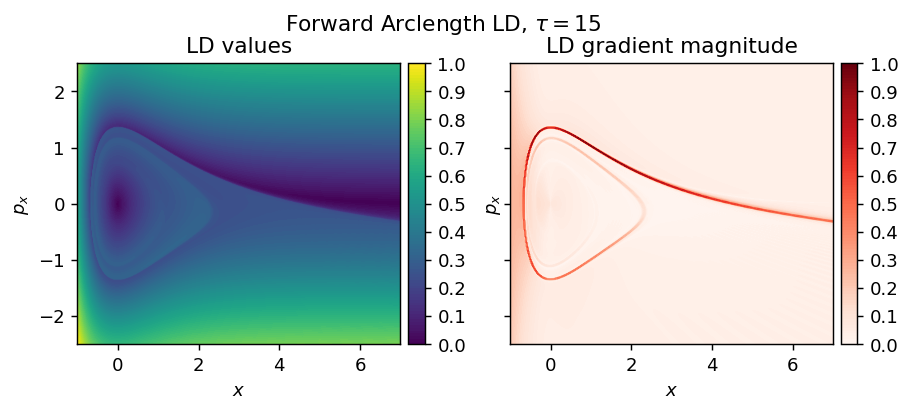

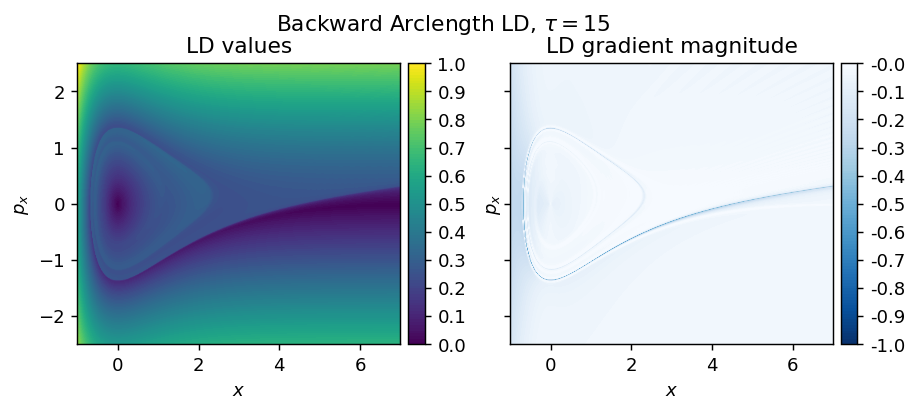

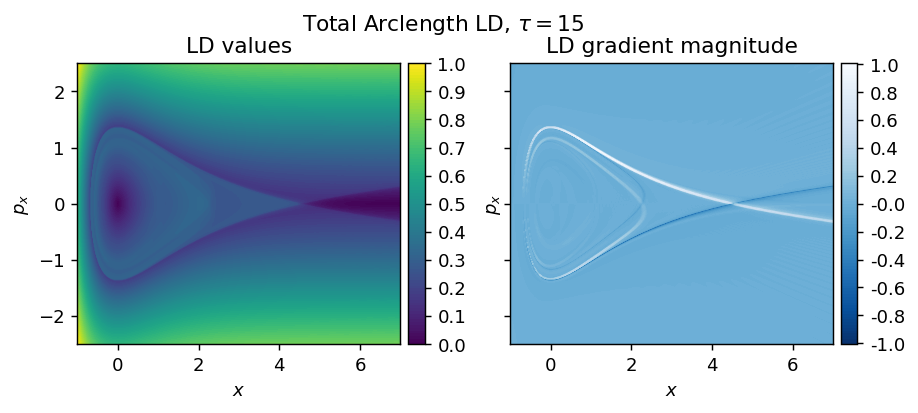

In [32]:
# Integration parameters (Calculate LDs at time t = t0 by integrating in the interval [t0-tau,t0+tau])
t0 = 0
tau = 15

# LDs definition (we will use the arclength)
p_value = 2

LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)